In [714]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(os.path.join('Practice_Materials', 'data.csv'))
df = df.sort_values(by=['Department'])
df = df.replace('abc', np.nan)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
salary = df.groupby('Department')['Salary'].transform('mean')
df['Salary'] = df['Salary'].fillna(salary).astype(int)
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)
print(df)

     Name   Department  Salary  Experience  Age Country
0   Arjun  Engineering   90000           3   25   India
1   Meera  Engineering  120000           5   28   India
2  Vikram  Engineering   70000           1   23   India
9    Zara  Engineering   93333           4   27   India
5  Fatima           HR   55000           6   32      UK
6   Imran           HR   60000           7   27   India
3  Ayesha    Marketing   65000           4   29     UAE
4   Rohan    Marketing   65000           2   26   India
7    John        Sales   45000           2   24     USA
8   Sarah        Sales   80000           5   31     USA


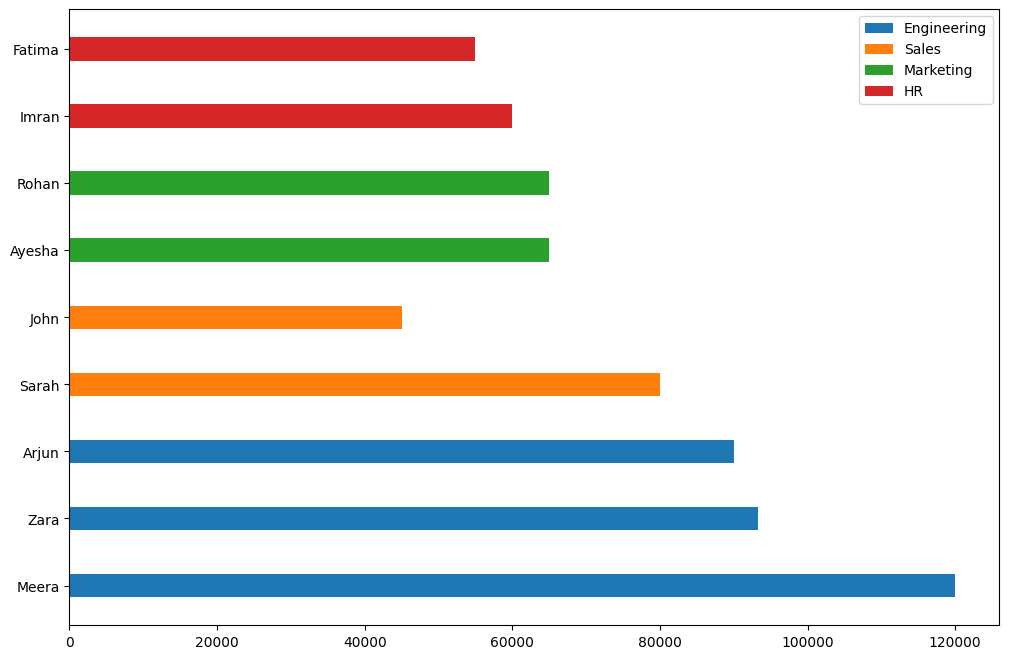

In [715]:
df = df.sort_values(by=['Salary'],ascending=False)
df = df.set_index('Name')
department = df.groupby("Department")
top_earners = department["Salary"].nlargest(3)
earners = {}
i = 0
names = []
salaries = []
for department in df["Department"].unique():
    names = top_earners.loc[department,:].index
    salaries = top_earners.loc[department,:].values
    earners[department] = [names, salaries]

height = 0.35
start = 0
all_names = []
for department in df["Department"].unique():
    size = len(earners[department][0])
    y = np.arange(start,size+start)
    plt.barh(y,earners[department][1], label=department, height=height)
    all_names.extend(earners[department][0])
    start += len(y)
all_y = np.arange(len(all_names))
plt.yticks(all_y,all_names)
plt.legend()
plt.show()

In [712]:
conditions = [
     df['Salary'] < 60000,
     df['Salary'] < 90000,
     df['Salary'] >= 90000,
]
choices = ['Low', 'Mid', 'High']
df['Salaries_band'] = np.select(conditions, choices, default='UnKnown')
print(df)


         Department  Salary  Experience  Age Country Salaries_band
Name                                                              
Meera   Engineering  120000           5   28   India          High
Zara    Engineering   93333           4   27   India          High
Arjun   Engineering   90000           3   25   India          High
Sarah         Sales   80000           5   31     USA           Mid
Vikram  Engineering   70000           1   23   India           Mid
Ayesha    Marketing   65000           4   29     UAE           Mid
Rohan     Marketing   65000           2   26   India           Mid
Imran            HR   60000           7   27   India           Mid
Fatima           HR   55000           6   32      UK           Low
John          Sales   45000           2   24     USA           Low


<function matplotlib.pyplot.show(close=None, block=None)>

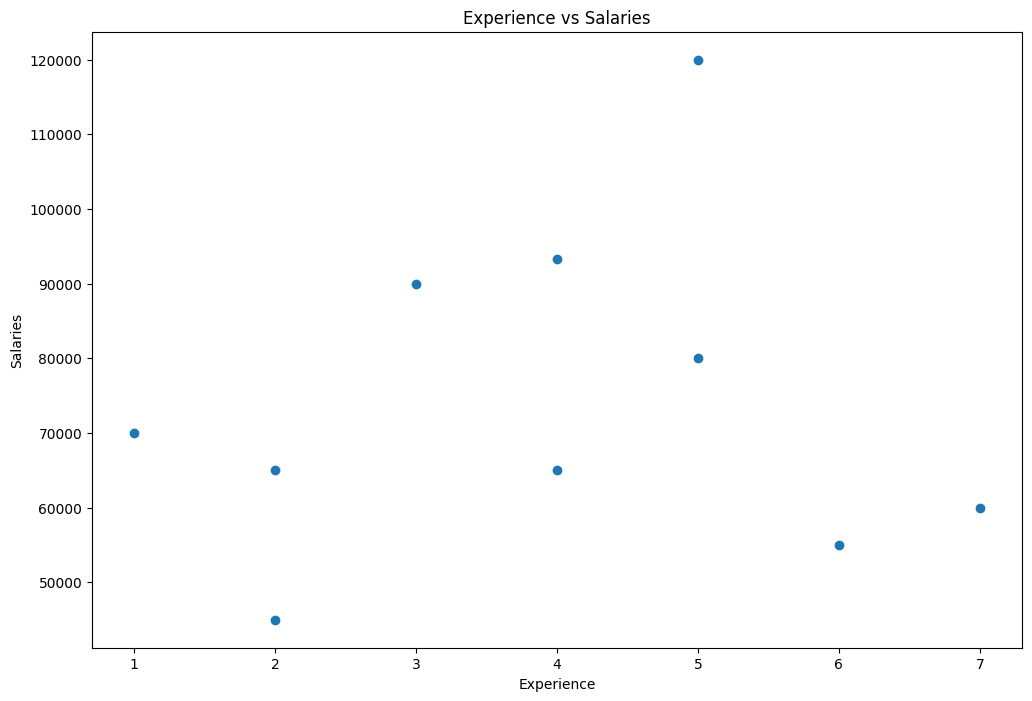

In [713]:
experience = df['Experience']
salaries = df['Salary']
mean_experience = np.mean(experience)
mean_salaries = np.mean(salaries)
corv = np.mean((experience-mean_experience) * (salaries-mean_salaries))
corr = corv/((np.std(experience))*(np.std(salaries)))

plt.scatter(experience, salaries)
plt.xlabel('Experience')
plt.ylabel('Salaries')
plt.title('Experience vs Salaries')
plt.show

In [716]:
import pandas as pd
pokemon = pd.read_csv('pokemon.csv', sep = ',')
pokemon

,No,Name,Type1,Type2,Height,Weight,Legendary
0,1,Bulbasaur,Grass,Poison,0.7,6.9,0
1,2,Ivysaur,Grass,Poison,1.0,13.0,0
2,3,Venusaur,Grass,Poison,2.0,100.0,0
3,4,Charmander,Fire,NaN,0.6,8.5,0
4,5,Charmeleon,Fire,NaN,1.1,19.0,0
...,...,...,...,...,...,...,...
145,146,Moltres,Fire,Flying,2.0,60.0,1
146,147,Dratini,Dragon,NaN,1.8,3.3,0
147,148,Dragonair,Dragon,NaN,4.0,16.5,0
148,149,Dragonite,Dragon,Flying,2.2,210.0,0
